In [2]:
from pdastro import pdastrostatsclass
import re
phot = pdastrostatsclass()

#d2d is calculated when gaia is matched to the objects, and is the distance 
# between the objects and their matched gaia positions. Give a rough upper limit on 
# what a good match should fall into
d2d_max = 0.2

In [34]:
cal_filename = 'v1/jw01144030001_02101_00004_nrcblong_cal.phot.txt'
gaia_align_filename = re.sub('cal.phot.txt$','tweakregstep.phot.txt',cal_filename)
if cal_filename == gaia_align_filename:
    print('ERROR!!!!!!!!!!!!')

good matched objects: 741


<AxesSubplot:xlabel='ra', ylabel='ddec'>

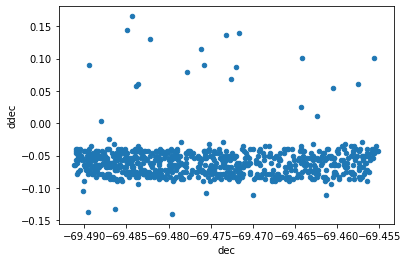

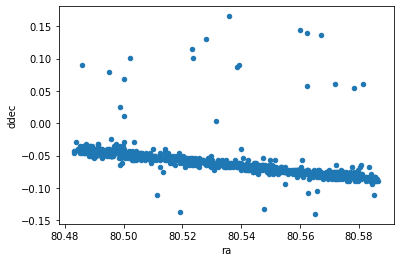

In [35]:
phot.load(cal_filename)
ixs_clean = phot.ix_inrange('d2d',None,d2d_max)
print(f'good matched objects: {len(ixs_clean)}')
phot.t.loc[ixs_clean,'dx_idl'] = phot.t.loc[ixs_clean,'cat_x_idl'] - phot.t.loc[ixs_clean,'x_idl']
#phot.t.plot.scatter('x_idl','dx_idl')
phot.t.loc[ixs_clean,'ddec'] = 3600.0*(phot.t.loc[ixs_clean,'cat_dec'] - phot.t.loc[ixs_clean,'dec'])
phot.t.plot.scatter('dec','ddec')
phot.t.plot.scatter('ra','ddec')
#phot.write(columns=['cat_dec','dec'])



good matched objects: 741
Keeping 730 out of 6092, skippin 5362 because of null values in columns ddec
median: 0.000000
i:00 mean:0.000000(0.000735) stdev:0.019850(0.000519) X2norm:1.00 Nchanged:0 Ngood:730 Nclip:0

mean: 0.000207
i:01 mean:0.000207(0.000198) stdev:0.005278(0.000140) X2norm:1.00 Nchanged:16 Ngood:714 Nclip:16

mean: 0.000144
i:02 mean:0.000144(0.000168) stdev:0.004444(0.000119) X2norm:1.00 Nchanged:13 Ngood:701 Nclip:29

mean: 0.000021
i:03 mean:0.000021(0.000155) stdev:0.004062(0.000109) X2norm:1.00 Nchanged:12 Ngood:689 Nclip:41

mean: 0.000021
i:04 mean:0.000021(0.000155) stdev:0.004062(0.000109) X2norm:1.00 Nchanged:0 Ngood:689 Nclip:41
i:04 mean:0.000021(0.000155) stdev:0.004062(0.000109) X2norm:1.00 Nchanged:0 Ngood:689 Nclip:41


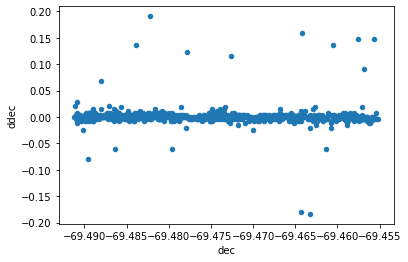

In [36]:
phot_gaia = pdastrostatsclass()
phot_gaia.load(gaia_align_filename)
ixs_clean_gaia = phot_gaia.ix_inrange('d2d',None,d2d_max)
print(f'good matched objects: {len(ixs_clean)}')
phot_gaia.t.loc[ixs_clean_gaia,'dx_idl'] = phot_gaia.t.loc[ixs_clean_gaia,'cat_x_idl'] - phot_gaia.t.loc[ixs_clean_gaia,'x_idl']
#phot_gaia.t.plot.scatter('x_idl','dx_idl')
phot_gaia.t.loc[ixs_clean_gaia,'ddec'] = 3600.0*(phot_gaia.t.loc[ixs_clean_gaia,'cat_dec'] - phot_gaia.t.loc[ixs_clean_gaia,'dec'])
phot_gaia.t.plot.scatter('dec','ddec')

phot_gaia.calcaverage_sigmacutloop('ddec',verbose=3)
print(phot_gaia.statstring())
#phot_gaia.t['test_ddec'] = 3600.0*(phot_gaia.t['dec']-phot.t['dec'])
#phot_gaia.t.plot.scatter('dec','test_ddec')
#print(phot_gaia.t['test_ddec'])


In [39]:
cal_filename = 'v2_nonewdist/jw01144030001_02101_00004_nrcblong_cal.phot.txt'
gaia_align_filename = re.sub('cal.phot.txt$','tweakregstep.phot.txt',cal_filename)


good matched objects: 741
good matched objects: 741
Keeping 731 out of 6092, skippin 5361 because of null values in columns ddec
median: 0.000000
i:00 mean:0.000000(0.000776) stdev:0.020978(0.000549) X2norm:1.00 Nchanged:0 Ngood:731 Nclip:0

mean: 0.000346
i:01 mean:0.000346(0.000351) stdev:0.009396(0.000248) X2norm:1.00 Nchanged:13 Ngood:718 Nclip:13

mean: 0.000491
i:02 mean:0.000491(0.000316) stdev:0.008415(0.000223) X2norm:1.00 Nchanged:7 Ngood:711 Nclip:20

mean: 0.000673
i:03 mean:0.000673(0.000307) stdev:0.008161(0.000217) X2norm:1.00 Nchanged:5 Ngood:706 Nclip:25

mean: 0.000638
i:04 mean:0.000638(0.000306) stdev:0.008115(0.000216) X2norm:1.00 Nchanged:1 Ngood:705 Nclip:26

mean: 0.000638
i:05 mean:0.000638(0.000306) stdev:0.008115(0.000216) X2norm:1.00 Nchanged:0 Ngood:705 Nclip:26
i:05 mean:0.000638(0.000306) stdev:0.008115(0.000216) X2norm:1.00 Nchanged:0 Ngood:705 Nclip:26


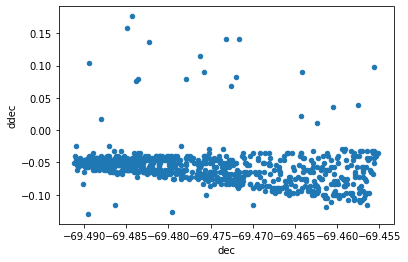

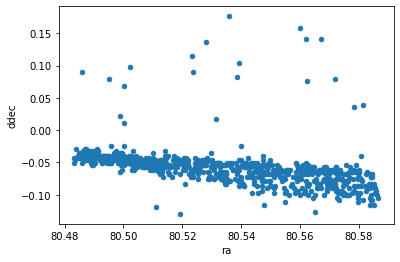

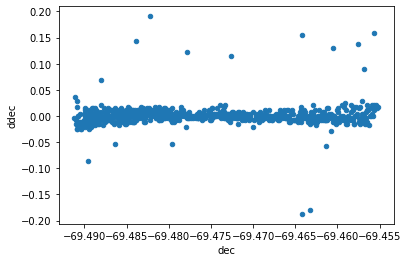

In [40]:
phot.load(cal_filename)
ixs_clean = phot.ix_inrange('d2d',None,d2d_max)
print(f'good matched objects: {len(ixs_clean)}')
phot.t.loc[ixs_clean,'dx_idl'] = phot.t.loc[ixs_clean,'cat_x_idl'] - phot.t.loc[ixs_clean,'x_idl']
#phot.t.plot.scatter('x_idl','dx_idl')
phot.t.loc[ixs_clean,'ddec'] = 3600.0*(phot.t.loc[ixs_clean,'cat_dec'] - phot.t.loc[ixs_clean,'dec'])
phot.t.plot.scatter('dec','ddec')
phot.t.plot.scatter('ra','ddec')

#phot.write(columns=['cat_dec','dec'])
phot_gaia = pdastrostatsclass()
phot_gaia.load(gaia_align_filename)
ixs_clean_gaia = phot_gaia.ix_inrange('d2d',None,d2d_max)
print(f'good matched objects: {len(ixs_clean)}')
phot_gaia.t.loc[ixs_clean_gaia,'dx_idl'] = phot_gaia.t.loc[ixs_clean_gaia,'cat_x_idl'] - phot_gaia.t.loc[ixs_clean_gaia,'x_idl']
#phot_gaia.t.plot.scatter('x_idl','dx_idl')
phot_gaia.t.loc[ixs_clean_gaia,'ddec'] = 3600.0*(phot_gaia.t.loc[ixs_clean_gaia,'cat_dec'] - phot_gaia.t.loc[ixs_clean_gaia,'dec'])
phot_gaia.t.plot.scatter('dec','ddec')

phot_gaia.calcaverage_sigmacutloop('ddec',verbose=3)
print(phot_gaia.statstring())


In [63]:
from astropy.io import fits
import sys
from astropy.table import Table
from astropy.utils.diff import report_diff_values
import asdf

cal_newdist = fits.open('v1/jw01144030001_02101_00004_nrcblong_cal.fits')
tnew=Table.read(cal_newdist['ASDF'])
cal_olddist = fits.open('v2_nonewdist/jw01144030001_02101_00004_nrcblong_cal.fits')
told=Table.read(cal_olddist['ASDF'])
print('------------------------')
identical = report_diff_values(told['ASDF_METADATA'][0][:],tnew['ASDF_METADATA'][0][:], fileobj=sys.stdout)




------------------------
  at [552]:
    a> 116
    b> 99
  at [553]:
    a> 114
    b> 111
  at [554]:
    a> 97
    b> 114
  ...and at 566 more indices.


In [66]:
from jwst.datamodels import ImageModel
x=[10,1000,2000]
y=x
image_model_newdist = ImageModel(cal_newdist)
ra_newdist,dec_newdist = image_model_newdist.meta.wcs(x,y)
print(ra_newdist,dec_newdist)
image_model_olddist = ImageModel(cal_olddist)
ra_olddist,dec_olddist = image_model_olddist.meta.wcs(x,y)
print(ra_olddist,dec_olddist)


[80.48222166 80.53378355 80.58520479] [-69.4909204  -69.47389013 -69.45708497]
[80.48222166 80.53378355 80.58520479] [-69.4909204  -69.47389013 -69.45708497]
